In [136]:
import os

import pandas as pd
import numpy as np
import math
import itertools

import h5py

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam


import matplotlib.pyplot as plt
import seaborn as sns

import visualkeras
from PIL import ImageFont

In [137]:
IMAGE_SIZE = 256
IMAGE_DIRECTORY = './Data/'

In [138]:
filename = 'train_catvnoncat.h5'
f = h5py.File(IMAGE_DIRECTORY+filename, 'r')

In [139]:
list(f.keys())

['list_classes', 'train_set_x', 'train_set_y']

In [140]:
data_train = list(f['train_set_x'])
data_label = list(f['train_set_y'])

In [141]:
X_tr=np.array(data_train)
y_tr= np.array(data_label)

In [142]:
filename = 'test_catvnoncat.h5'
f = h5py.File(IMAGE_DIRECTORY+filename, 'r')

In [143]:
list(f.keys())

['list_classes', 'test_set_x', 'test_set_y']

In [144]:
data_test = list(f['test_set_x'])
data_label_test = list(f['test_set_y'])

In [145]:
X_test=np.array(data_test)
y_test= np.array(data_label_test)


# Mostrando alguns exemplos de imagens

(64, 64, 3)


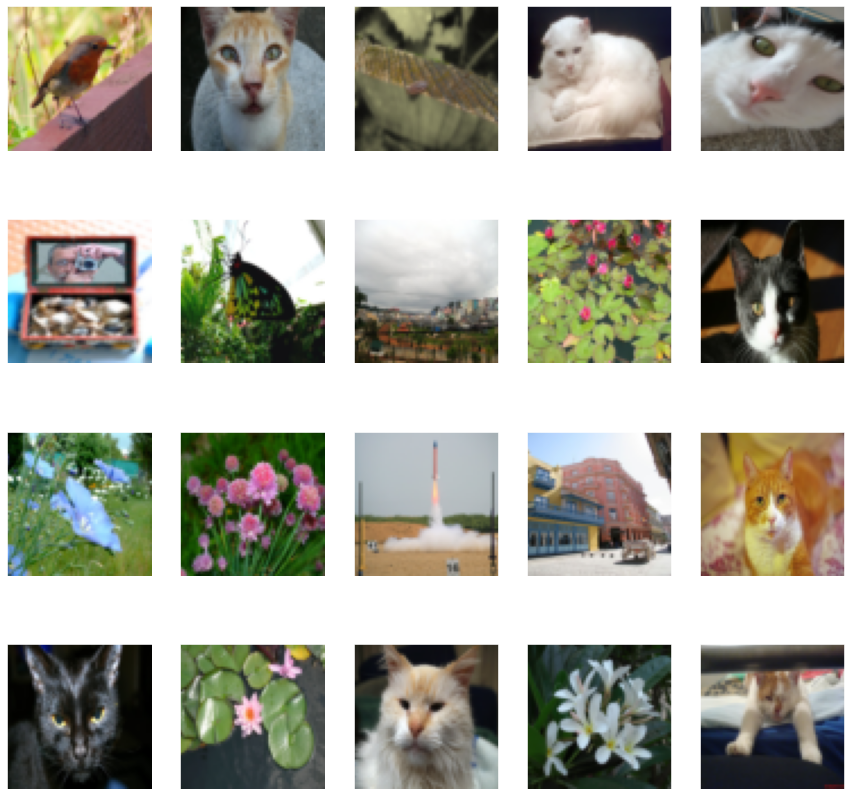

In [146]:
print(data_train[1].shape)
n=20
plt.figure(figsize=(15, 15))
for i in range(n):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(data_train[i+10])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Visualizando se as classes estao razoavelmente balanceadas

/home/trdp/anaconda3/envs/ml_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

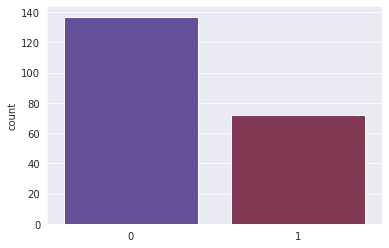

In [147]:
sns.set_style('darkgrid')
sns.countplot(y_tr,palette='twilight')

# Separando os dados em Treinamento e Validacao

In [148]:
X_train,X_val,Y_train,Y_val = train_test_split(X_tr,y_tr,test_size = 0.2, stratify=y_tr, random_state=123)
print('Shape of train set feature',X_train.shape)
print('Shape of validation set feature',X_val.shape)
print('Shape of train set label',Y_train.shape)
print('Shape of validation set label',Y_val.shape)

num_classes=2
input_shape = (64,64,3)

Y_train = to_categorical(Y_train, num_classes)
Y_val = to_categorical(Y_val, num_classes)
Y_test = to_categorical(y_test, num_classes)

Shape of train set feature (167, 64, 64, 3)
Shape of validation set feature (42, 64, 64, 3)
Shape of train set label (167,)
Shape of validation set label (42,)


In [149]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="selu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="selu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="selu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="selu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [150]:
lr=0.001

# Compile the model.
model.compile(
  optimizer=Adam(learning_rate=lr),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 64)        73792     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 32)         

## Visualizing the network architecture

Convolutional layers in yellow
Max Pooling in red
Dense in blue-green

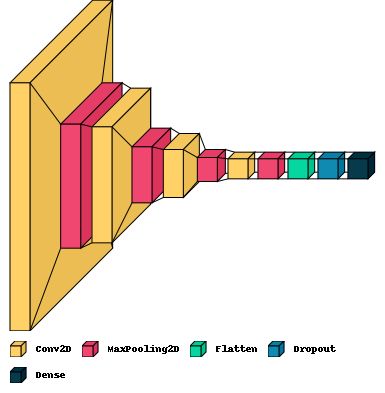

In [151]:
# Visualizing the network
visualkeras.layered_view(model, legend=True) 

In [152]:
model.fit(X_train, Y_train,validation_data = (X_val, Y_val),epochs=40, batch_size=16)

Epoch 1/40
11/11 [==============================] - 2s 174ms/step - loss: 27.7249 - accuracy: 0.5168 - val_loss: 2.3577 - val_accuracy: 0.6667
Epoch 2/40
11/11 [==============================] - 1s 132ms/step - loss: 6.0805 - accuracy: 0.5658 - val_loss: 0.7866 - val_accuracy: 0.6429
Epoch 3/40
11/11 [==============================] - 2s 141ms/step - loss: 1.9682 - accuracy: 0.6188 - val_loss: 0.6881 - val_accuracy: 0.6667
Epoch 4/40
11/11 [==============================] - 2s 156ms/step - loss: 1.4518 - accuracy: 0.6751 - val_loss: 0.8000 - val_accuracy: 0.6905
Epoch 5/40
11/11 [==============================] - 1s 137ms/step - loss: 1.0530 - accuracy: 0.6535 - val_loss: 0.5655 - val_accuracy: 0.6905
Epoch 6/40
11/11 [==============================] - 1s 134ms/step - loss: 0.9836 - accuracy: 0.6586 - val_loss: 0.5638 - val_accuracy: 0.6667
Epoch 7/40
11/11 [==============================] - 2s 149ms/step - loss: 1.0375 - accuracy: 0.6433 - val_loss: 0.4522 - val_accuracy: 0.7143
Epoch

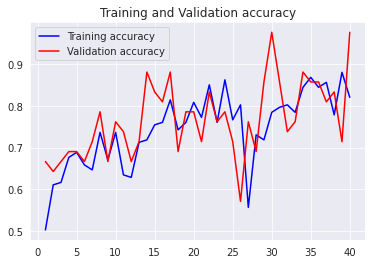

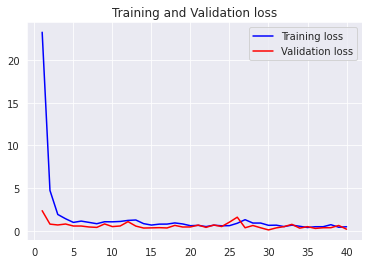

In [153]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label= 'Training loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [154]:
TrainPredictions = model.predict(X_train)
TrainPredictions = np.argmax(TrainPredictions, axis=1)

/tmp/ipykernel_18153/842564109.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


Text(0.5, 15.0, 'Predicted label')

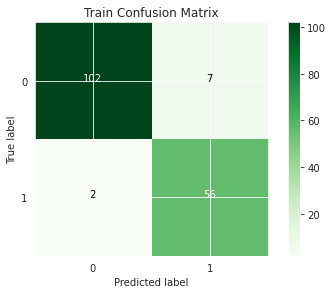

In [155]:
train_labels = np.argmax(Y_train, axis=1)
conf = confusion_matrix(train_labels, TrainPredictions)

classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Train Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [156]:
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(train_labels, TrainPredictions)))


Accuracy: 0.9461



In [157]:
TestPredictions = model.predict(X_test)
TestPredictions = np.argmax(TestPredictions, axis=1)

/tmp/ipykernel_18153/4138974174.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


Text(0.5, 15.0, 'Predicted label')

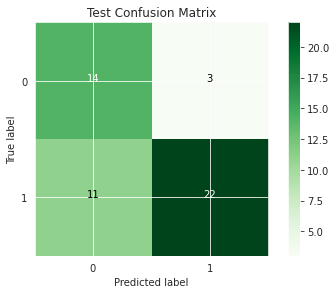

In [158]:
test_labels = np.argmax(Y_test, axis=1)
conf = confusion_matrix(test_labels, TestPredictions)

classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Test Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [159]:
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(test_labels, TestPredictions)))


Accuracy: 0.7200



In [160]:
print(X_test[1].shape)
x = np.expand_dims(X_test[1], axis=0)
print(x.shape)
Predictions = model.predict(x)

(64, 64, 3)
(1, 64, 64, 3)


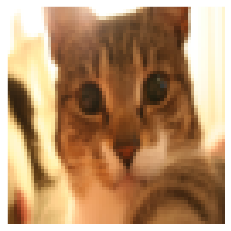

E UM GATO


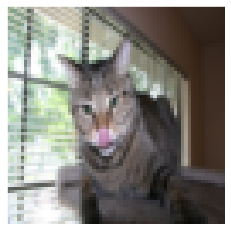

NAO E UM GATO


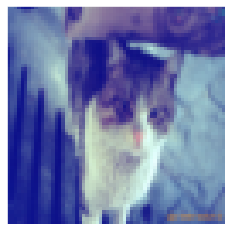

NAO E UM GATO


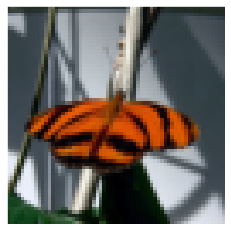

NAO E UM GATO


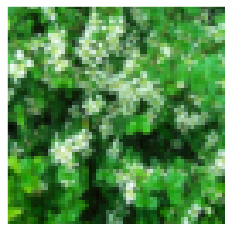

NAO E UM GATO


In [161]:
import random 

n=[random.randint(0,len(data_test)) for i in range(5)]

for i in n:
    #ax = plt.subplot(4, 5, i + 1)
    ax = plt.subplot()
    plt.imshow(data_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

    Predictions = model.predict(np.expand_dims(X_test[i], axis=0))
    Predictions = np.argmax(Predictions, axis=1)
    if Predictions==0:
      print('NAO E UM GATO')
    else:
      print('E UM GATO')

